<a href="https://colab.research.google.com/github/Riya0923/Titanic_Train_Data/blob/master/Titatic_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
df =pd.read_csv('/content/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
# Checking for the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
df.shape

(891, 12)

In [43]:
# Drop the data sample with missing values in the column "Embarked"
df1=df.dropna(axis ='rows', subset = ['Embarked'])
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [45]:
# Dropping the entire column 'Cabin' as 80% of the column data was null.
df2=df1.drop('Cabin',axis='columns')
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [46]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [47]:
# Taking mean value, assumming that there is no relation of 'Age' column with others
print(df2['Age'].mean())
print(df2['Age'].median())

29.64209269662921
28.0


<Axes: >

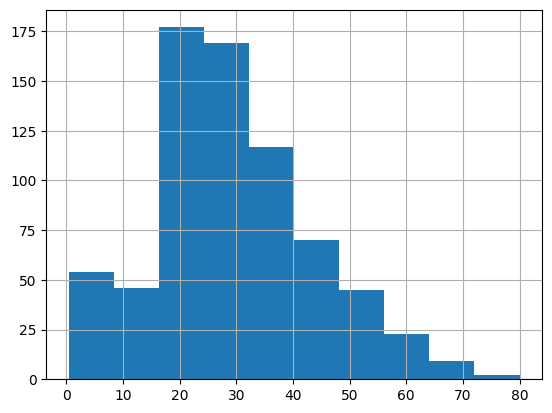

In [48]:
# Histogram plot to identify outliers
df2['Age'].hist()

<Axes: >

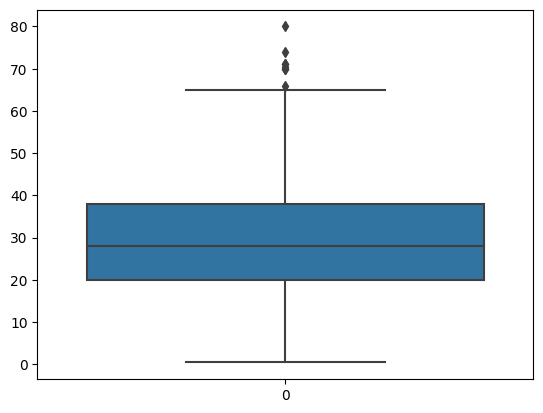

In [49]:
# Boxplot for identifying outliers
import seaborn as sns
sns.boxplot(df2['Age'])

In [50]:
# Filling the values of Age with the value of mean
df2['Age']=df2['Age'].fillna(29.70)

In [51]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Fix missing values of 'Age' column by first analysing if 'Age' is dependent on any other factor or not**

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
# Average age of male and female passengers
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [54]:
# Since there was not much difference between the average ages of males and females, thus we'll go for Pclass
# Average age of passengers in different passenger classes
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Here, we can observe a noticiable difference between the ages of 3 classes of passengers, thus we cannot take the age of P2 class as an average.Thus, we can say that Age is affecting the factor of Pclass.

In [55]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
# Data whose age values are null
dfa0=df[df['Age'].isnull()]
dfa0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [57]:
# Data whose age values are not null (using ~ operator)
dfa1= df[~df['Age'].isnull()]
dfa1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
# Assigning values to the null values of the 'Age' column according to its dependency on Pclass
dfa0['Pclass'].apply(lambda x: 25.14 if x==3 else 29.87 if x==2 else 38.23)

5      25.14
17     29.87
19     25.14
26     25.14
28     25.14
       ...  
859    25.14
863    25.14
868    25.14
878    25.14
888    25.14
Name: Pclass, Length: 177, dtype: float64

In [63]:
# Updating the null values data of 'Age'
dfa0['Age']=dfa0['Pclass'].apply(lambda x: 25.14 if x==3 else 29.87 if x==2 else 38.23)

<ipython-input-63-e8aa27c1cd00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa0['Age']=dfa0['Pclass'].apply(lambda x: 25.14 if x==3 else 29.87 if x==2 else 38.23)


In [62]:
dfa0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,25.14,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.87,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,25.14,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,25.14,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,25.14,0,0,330959,7.8792,NaN,Q


In [69]:
# Concatenating the non-null data of Age and the updated one
df_new=pd.concat((dfa0,dfa1), ignore_index=True)
df_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,6,0,3,"Moran, Mr. James",male,25.14,0,0,330877,8.4583,NaN,Q
1,18,1,2,"Williams, Mr. Charles Eugene",male,29.87,0,0,244373,13.0000,NaN,S
2,20,1,3,"Masselmani, Mrs. Fatima",female,25.14,0,0,2649,7.2250,NaN,C
3,27,0,3,"Emir, Mr. Farred Chehab",male,25.14,0,0,2631,7.2250,NaN,C
4,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,25.14,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.00,0,5,382652,29.1250,NaN,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C


In [70]:
df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,6,0,3,"Moran, Mr. James",male,25.14,0,0,330877,8.4583,NaN,Q
1,18,1,2,"Williams, Mr. Charles Eugene",male,29.87,0,0,244373,13.0000,NaN,S
2,20,1,3,"Masselmani, Mrs. Fatima",female,25.14,0,0,2649,7.2250,NaN,C
3,27,0,3,"Emir, Mr. Farred Chehab",male,25.14,0,0,2631,7.2250,NaN,C
4,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,25.14,0,0,330959,7.8792,NaN,Q


Now, remove the Cabin column and the null rows of the Embarked Column again.

In [71]:
df_new=df_new.dropna(axis ='rows', subset = ['Embarked'])
df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,6,0,3,"Moran, Mr. James",male,25.14,0,0,330877,8.4583,NaN,Q
1,18,1,2,"Williams, Mr. Charles Eugene",male,29.87,0,0,244373,13.0000,NaN,S
2,20,1,3,"Masselmani, Mrs. Fatima",female,25.14,0,0,2649,7.2250,NaN,C
3,27,0,3,"Emir, Mr. Farred Chehab",male,25.14,0,0,2631,7.2250,NaN,C
4,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,25.14,0,0,330959,7.8792,NaN,Q


In [72]:
df_new=df_new.drop('Cabin',axis='columns')
df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,6,0,3,"Moran, Mr. James",male,25.14,0,0,330877,8.4583,Q
1,18,1,2,"Williams, Mr. Charles Eugene",male,29.87,0,0,244373,13.0000,S
2,20,1,3,"Masselmani, Mrs. Fatima",female,25.14,0,0,2649,7.2250,C
3,27,0,3,"Emir, Mr. Farred Chehab",male,25.14,0,0,2631,7.2250,C
4,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,25.14,0,0,330959,7.8792,Q
